## Codio Activity 2.1: Continuous Uniform Distributions

### This activity focuses on creating and visualizing continuous probability distributions using scipy.stats. You will get practice creating uniform distribution objects, examining their summary statistics (mean, variance, standard deviation), and visualizing the distribution using matplotlib.

In [1]:
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

### Problem 1: Creating a Distribution Object

#### To begin, use the above imported uniform function to create a uniform distribution object with loc = 10 and scale = 3. Assign your solution as a distribution object to dist1 below.

In [2]:
dist1 = uniform(loc = 10, scale = 3)


### Problem 2: Descriptive Statistics of Distribution

#### Using your distribution object from problem 1, determine the mean, variance, and standard deviation of the distribution using its own built in methods. Assign these as floats to the variables, dist1_mean, dist1_var, and dist1_std below.

In [3]:
dist1_mean = dist1.mean()
dist1_var = dist1.var()
dist1_std = dist1.std()

### Problem 3: Plotting the Distribution

#### Note that the distribution is bound by loc and loc + scale on the left and right sides respectively. To build a plot, we will give one unit extra on each so we see the entire distribution. To do so, define x using np.linspace and create an array of 100 evenly spaced values starting at 9 and ending at 14. Then, use these x values with dist1's .pdf method to produce a plot of the distribution using plt.plot. You should have a plot similar to that shown below.

In [6]:
x = np.linspace(9,14,100)
ppoints = dist1.pdf(x)

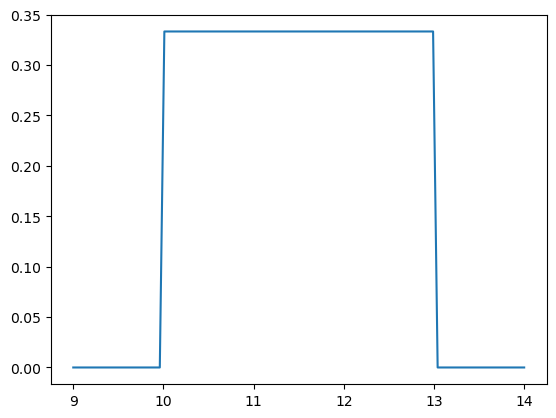

In [20]:
plt.plot(x,ppoints)

#### Sampling(rvs)

(array([1., 0., 0., 2., 1., 0., 0., 0., 0., 1.]),
 array([10.21446635, 10.3666251 , 10.51878384, 10.67094259, 10.82310133,
        10.97526008, 11.12741883, 11.27957757, 11.43173632, 11.58389506,
        11.73605381]),
 <BarContainer object of 10 artists>)

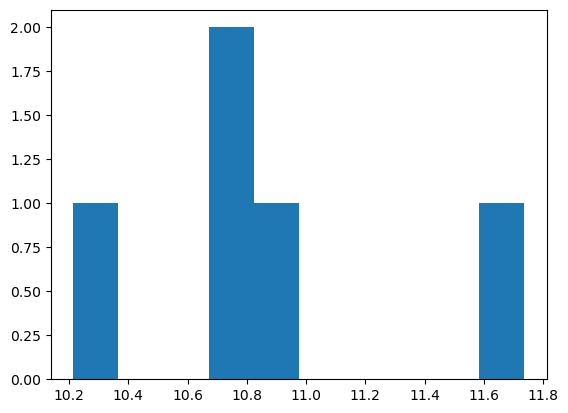

In [17]:
plt.hist(dist1.rvs(size=5))

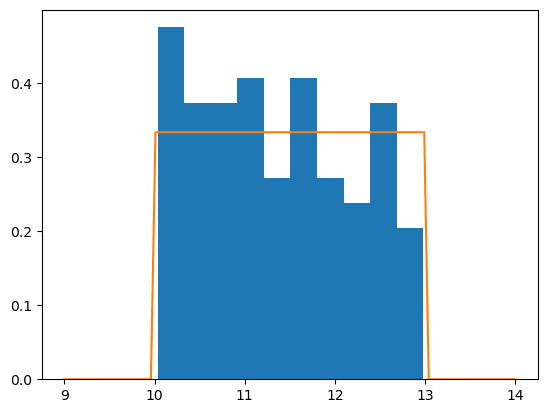

In [19]:
# rvs(size =100) get random 100 samples, density = True means they are at the right scale
plt.hist(dist1.rvs(size = 100), density = True)
plt.plot(x, ppoints)

### Problem 4: Evaluating Probabilities 

Finally, you want to use the `.pdf` method to evaluate the probability of a specific outcome.  Determine the following probabilities using `dist1` and assign to the respective variables as floats below. Consider the events P(11) and P(12) mutually exclusive events.

- $P(9)$
- $P(11)$
- $P(11~ \text{or} ~12)$
  

In [12]:
p_9 = dist1.pdf(9)
p_9

np.float64(0.0)

In [13]:
p_11 = dist1.pdf(11)
p_11

np.float64(0.3333333333333333)

In [15]:
# important: 2 points pdf is the addition of the two pdf
p_11_or_12 = dist1.pdf(11)+dist1.pdf(12)
p_11_or_12

np.float64(0.6666666666666666)

### Problem 5: Cumulative Probabilities

The `.cdf` method can be used to determine cumulative probabilities.  Use the `.cdf` method of `dist1` to determine the following probabilities and assign them as a float to the relevant variable below. 

- $P(x < 12)$
- $P(11 < x < 13)$
- $P(x > 12)$

In [22]:
p_less_12 = dist1.cdf(12)
p_less_12

np.float64(0.6666666666666666)

In [23]:
p_11_and_13 = dist1.cdf(13) - dist1.cdf(11)
p_11_and_13

np.float64(0.6666666666666667)

In [24]:
p_greater_12 = 1- dist1.cdf(12)
p_greater_12

np.float64(0.33333333333333337)

### Codio Activity 2.2: Gaussian Distributions

This activity focuses on generating and examining Gaussian distributions using `scipy.stats`.  The main idea is to use the distribution to generate a sample and compare the sample statistics to those known in your distribution.   Note that you are to use the `.rvs` method of the distribution object rather than any NumPy methods directly for generating samples.  


### Problem 1: Creating a Gaussian Distribution Object

Above, the Gaussian distribution function has been imported using the `norm` function from the `scipy.stats` library.

Use this function to create a Guassian distribution centered at 5 with standard deviation equal to 2.  Assign your solution as a distribution object to `gauss1` below.

In [25]:
gauss1 = norm(loc = 5, scale = 2)
gauss1

### Problem 2: Random Samples from Distribution

Use the `.rvs` method on `gauss1` to generate 100 random samples from the distribution.  Inside the `.rvs` method, set`random_state` equal to 12. Assign your response as an array to the variable `samples` below.